In [1]:
# Task 1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from matplotlib.offsetbox import OffsetImage, AnnotationBbox, TextArea
import umap

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [4]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [5]:
class_names = ["T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

In [6]:
print("training set images shape: ", x_train.shape)
print("training set labels shape: ", y_train.shape)
print("test set images shape: ", x_test.shape)
print("test set labels shape: ", y_test.shape)

training set images shape:  (60000, 28, 28)
training set labels shape:  (60000,)
test set images shape:  (10000, 28, 28)
test set labels shape:  (10000,)


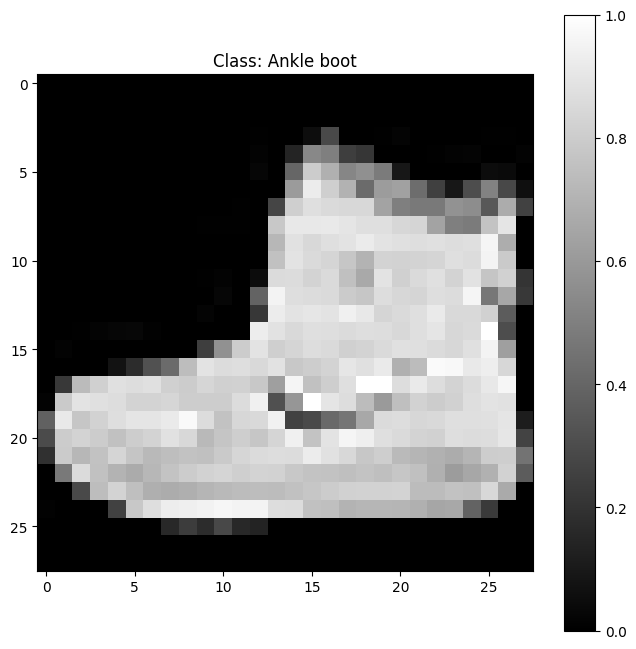

In [7]:
# display the first image from the training set
plt.figure(figsize=(8, 8))
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Class: {class_names[y_train[0]]}")
plt.colorbar()
plt.grid(False)
# plt.show()

In [8]:
# Task 2

class Autoencoder(Model):
  def __init__(self, latent_dim, shape):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim
    self.shape = shape
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(tf.math.reduce_prod(shape), activation='sigmoid'),
      layers.Reshape(shape)
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [9]:
shape = x_test.shape[1:]

In [10]:
latent_dim64 = 64
autoencoder64 = Autoencoder(latent_dim64, shape)

In [11]:
latent_dim2 = 2
autoencoder2 = Autoencoder(latent_dim2, shape)

In [12]:
latent_dim_miss = 64
autoencoder_miss = Autoencoder(latent_dim_miss, shape)

Q. what is an the purpose of the encoder?

A. the encoder part of an autoencoder learns to compress the input into a smaller encoding
 this encoding reduced representation of the input but captures its salient features.essentially
 the encoder transforms the input into a latent space representation. it learns to preserve only the aspects
 of the data that are most important for reconstructing it

Q. what is the purpose of the decoder?

A. the decoder takes the encoding provided by the encoder and attempts to recreate the original input using
 this reduced representation. the goal of the decoder is to reverse the process of the encoder, reconstructing
 the input data as accurately as possible from the compressed code


Q. what type of loss are we using and what does it do?

A. autoencoders typically use a reconstruction loss to train the network, which measures how well the decoders
 output matches the original input. the common types 

Q. What is the role of the latent space and why does it lead to different results in the visualizations?

A. the latent space in an autoencoder is the intermediate representation of the input data that the encoder compresses it into. it serves as a sort of bottleneck in the network, containing all the compressed information that the decoder will then use to reconstruct the original input. 

In [13]:
autoencoder64.compile(optimizer='adam', loss=losses.MeanSquaredError())
autoencoder2.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [14]:
autoencoder64.fit(x_train, x_train,
                epochs=5,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0240 - val_loss: 0.0133
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0116 - val_loss: 0.0106
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0101 - val_loss: 0.0098
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0095 - val_loss: 0.0094
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0092 - val_loss: 0.0092


In [15]:
autoencoder2.fit(x_train, x_train,
                epochs=5,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0695 - val_loss: 0.0584
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0552 - val_loss: 0.0515
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0490 - val_loss: 0.0467
Epoch 4/5
1875/1875 [==============================] - 2s 929us/step - loss: 0.0456 - val_loss: 0.0448
Epoch 5/5
1875/1875 [==============================] - 2s 954us/step - loss: 0.0446 - val_loss: 0.0443


In [16]:
encoded_imgs64 = autoencoder64.encoder(x_test).numpy()
decoded_imgs64 = autoencoder64.decoder(encoded_imgs64).numpy()

In [17]:
encoded_imgs2 = autoencoder2.encoder(x_test).numpy()
decoded_imgs2 = autoencoder2.decoder(encoded_imgs2).numpy()

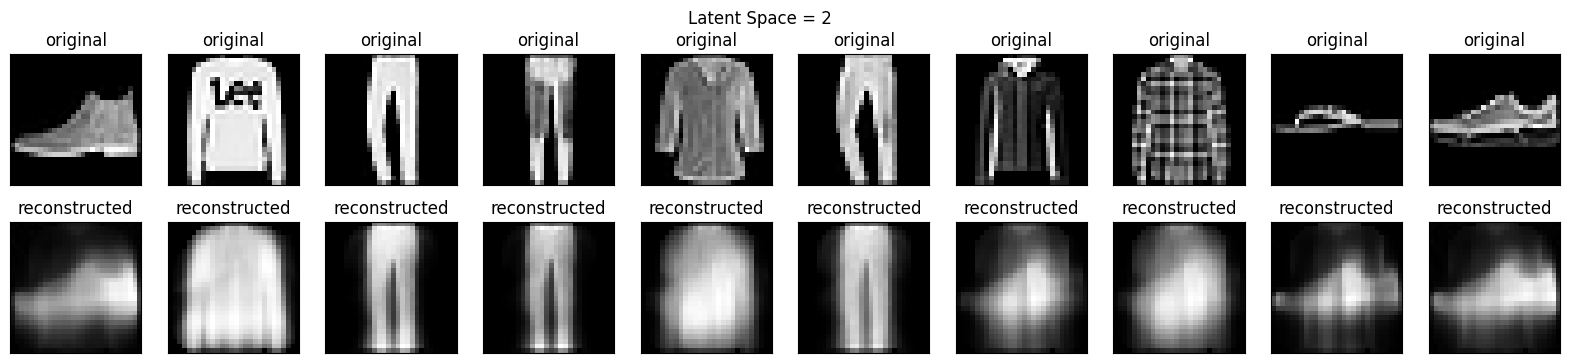

In [18]:
# visualization of the results

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs2[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.suptitle('Latent Space = 2')
plt.show()

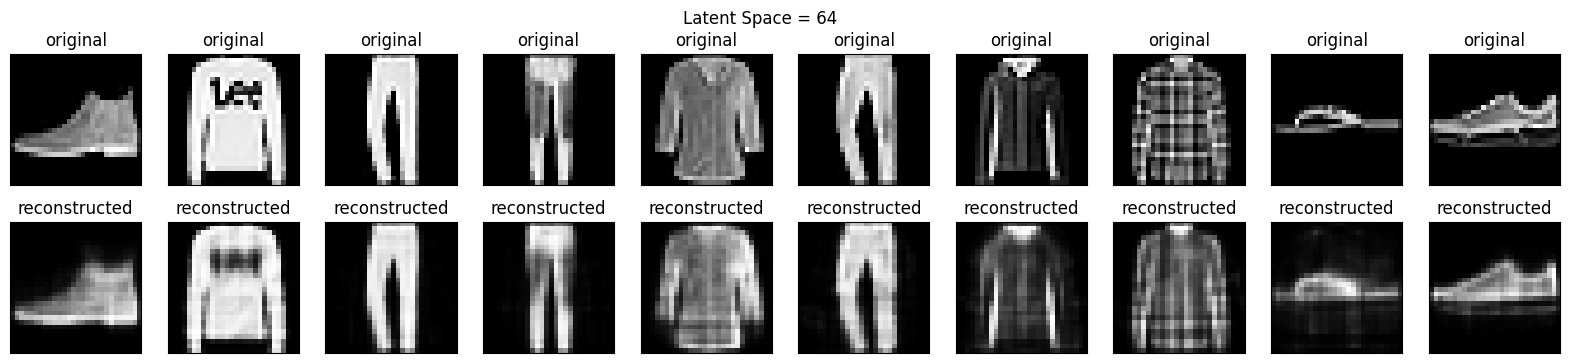

In [19]:
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs64[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.suptitle('Latent Space = 64')
plt.show()

In [20]:
# Task 3

# visualization latent space dim=2


In [21]:
# select a random amount of points to avoid plotting all points
idx = np.random.choice(len(x_test), 1000)

In [22]:
images = x_test[idx]
encodings = encoded_imgs2[idx]
labels = y_test[idx]

(1000, 2)


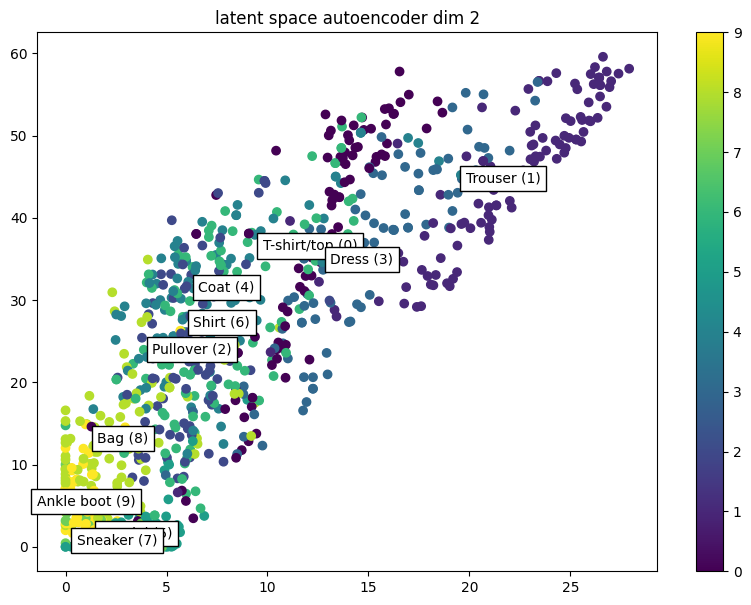

In [23]:
print(encodings.shape)
fig, ax = plt.subplots(figsize=(10, 7))
ax.set_title("latent space autoencoder dim 2")
plt.scatter(encodings[:, 0], encodings[:, 1], c=labels,cmap = "viridis")
plt.colorbar()
for i in range(10):
    class_center = np.mean(encodings[labels == i], axis=0)
    text = TextArea('{} ({})'.format(class_names[i], i))
    ab = AnnotationBbox(text, class_center, xycoords='data', frameon=True)
    ax.add_artist(ab)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


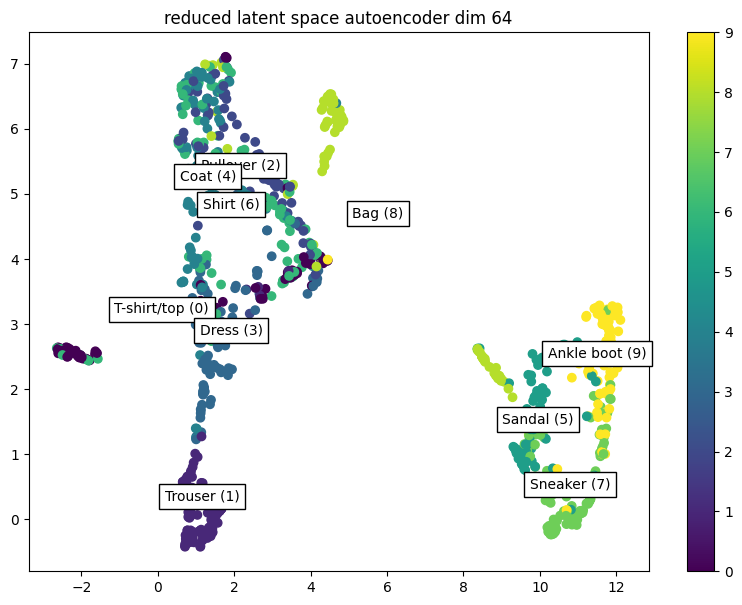

In [24]:
# reduce dimensionality from 64 to 2 using umap
reducer = umap.UMAP(n_neighbors=30, min_dist=0.0, n_components=2, random_state=42)
encodings64_reduced = reducer.fit_transform(encoded_imgs64[idx])

# plotting reduced latent space
fig, ax = plt.subplots(figsize=(10, 7))
ax.set_title("reduced latent space autoencoder dim 64")
scatter = plt.scatter(encodings64_reduced[:, 0], encodings64_reduced[:, 1], c=labels, cmap="viridis")
plt.colorbar(scatter)
for i in range(10):
    class_center = np.mean(encodings64_reduced[labels == i], axis=0)
    text = TextArea("{} ({})".format(class_names[i], i))
    ab = AnnotationBbox(text, class_center, xycoords="data", frameon=True)
    ax.add_artist(ab)
plt.show()

Answers to the questions


Q. What are your observations when comparing both visualizations of the latent space?

A. 
1. the classes are somewhat clustered but show a significant overlap, particularly among similar categories. (for the 2 dimensions one)
2. theres a visible trend, especially for distinct items like bags, sneakers and ankle boots which are isolated from the rest
3. 






Q. Which latent space shows better clusters and why is that the case?


A. 
1. the clusters are much more distinct and seperated, with very clear boundaries between the most classes (for the 64 dimensions one)
2. items like bags, sandals and ankle boots, and sneakers are highly isolated , indicating very distinct clustering
3. even similar clothing items like t shirts /tops, dresses and trousers show better operation
4. in contrast , the direct 2-dimensional space might be too limited to capture and seperate all the nuances of different classes effectively

In [25]:
# learning to fill missing patches

In [26]:
# Task 4

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

In [27]:
# Function to create a masked version of the images with a 10x10 block set to zero
def create_masked_images(images):
    masked_images = images.copy()
    center_x, center_y = images.shape[1] // 2, images.shape[2] // 2
    half_block_size = 5  # Since the block is 10x10
    masked_images[:, center_x-half_block_size:center_x+half_block_size, center_y-half_block_size:center_y+half_block_size] = 0
    return masked_images

In [28]:
# Create masked training and test sets
x_train_m = create_masked_images(x_train)
x_test_m = create_masked_images(x_test)

In [29]:
# Define the autoencoder class as previously
class Autoencoder(Model):
    def __init__(self, latent_dim, shape):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim
        self.shape = shape
        self.encoder = tf.keras.Sequential([
            layers.Flatten(),
            layers.Dense(latent_dim, activation='relu'),
        ])
        self.decoder = tf.keras.Sequential([
            layers.Dense(tf.math.reduce_prod(shape), activation='sigmoid'),
            layers.Reshape(shape)
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [30]:
# Instantiate the autoencoder model
shape = x_test.shape[1:]
latent_dim = 64  # Choose the appropriate latent dimension
autoencoder = Autoencoder(latent_dim, shape)

In [31]:
# Compile and train the autoencoder
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
autoencoder.fit(x_train_m, x_train,
                epochs=5,
                shuffle=True,
                validation_data=(x_test_m, x_test))

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0246 - val_loss: 0.0142
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0129 - val_loss: 0.0123
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0114 - val_loss: 0.0111
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0108 - val_loss: 0.0107
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0104 - val_loss: 0.0104


In [32]:
# Predict the masked test set
decoded_imgs = autoencoder.predict(x_test_m)

313/313 [==============================] - 0s 950us/step


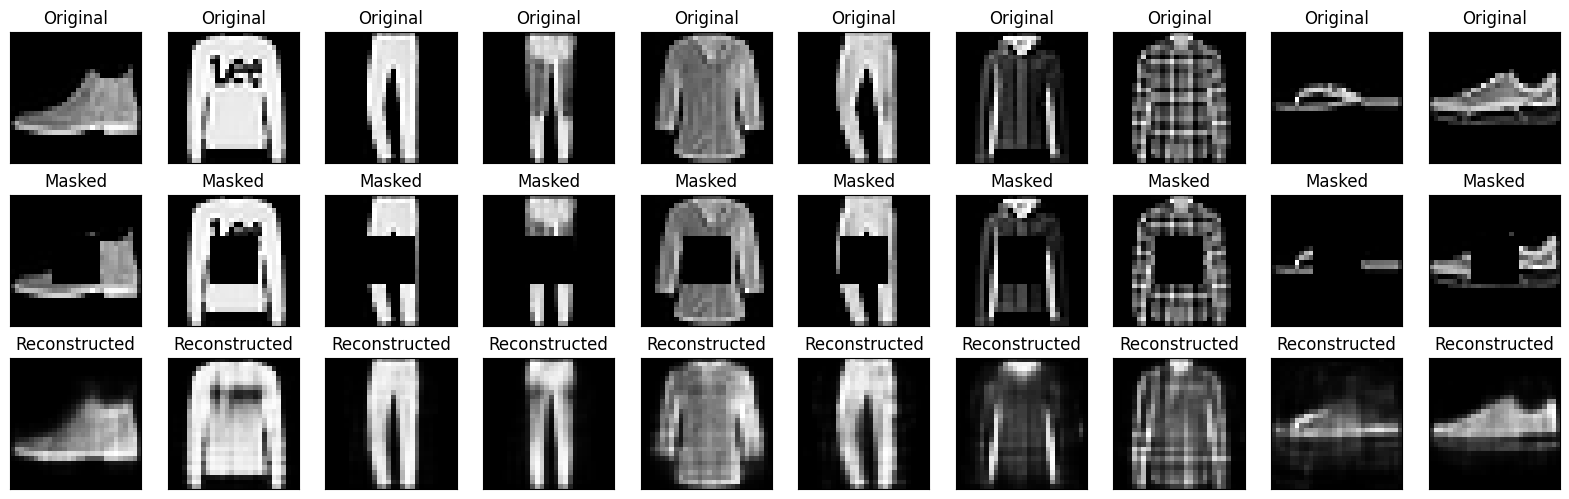

In [33]:
# Visualization of the results
n = 10  # Number of images to display
plt.figure(figsize=(20, 6))
for i in range(n):
    # Display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title("Original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display Masked
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_m[i], cmap='gray')
    plt.title("Masked")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display Reconstruction
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(decoded_imgs[i], cmap='gray')
    plt.title("Reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()